In [1]:
import cv2 as cv
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt

import os
plt.style.use('fivethirtyeight')

## Aux functions

In [12]:
def normalize(arr):
    _arr = arr[:]
    m,M = _arr.min(),_arr.max()
    _arr -= m
    _arr /= (M-m)
    return _arr

129


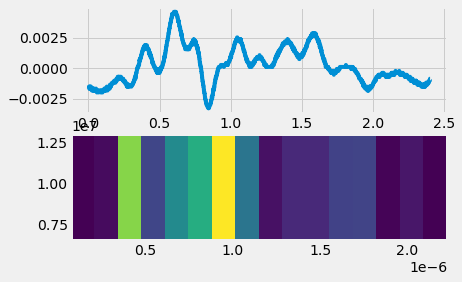

In [183]:
# Lista de arquivos ossos desmineralização 1
lista_arq_desm1=os.listdir('Dados/desm1/')
# Lista de arquivos ossos desmineralização 2
lista_arq_desm2=os.listdir('Dados/desm2/')
# Lista de arquivos ossos desmineralização 3
lista_arq_desm3=os.listdir('Dados/desm3/')
fig,axs=plt.subplots(2)
width = 4000
with open('Dados/desm3/'+lista_arq_desm3[140],'r') as f:
    x = f.readlines()
    dt = float(x[0])
    x = np.array(x[2:]).astype(float)
    idx = np.where(x==x.max())[0][0]
    x = x[idx-width//4:idx+3*width//4]
    _t = [i*dt for i in range(len(x))]
    axs[0].plot(_t,x)
    fs = 1.0/dt
    f, t, Sxx = signal.spectrogram(x, fs, scaling='density')
#     Sxx = normalize(Sxx)
    print(len(f))
    axs[1].pcolormesh(t,f[1:3],Sxx[1:3,:])

In [181]:
Sxx[1:3,:]

array([[9.08505765e-16, 7.66788670e-15, 2.16451620e-13, 5.50825774e-14,
        1.26188009e-13, 1.64017814e-13, 2.65024424e-13, 1.03263293e-13,
        1.20271970e-14, 3.06530459e-14, 3.10501302e-14, 5.25939663e-14,
        5.31341926e-14, 2.59621341e-15, 1.62091466e-14, 2.07614147e-16,
        7.68384223e-15],
       [1.64317392e-17, 2.65598242e-16, 1.11059802e-14, 6.98209135e-16,
        4.82485585e-15, 3.22022201e-14, 2.60074449e-15, 4.56159938e-16,
        4.49714529e-15, 1.47220400e-15, 6.38107804e-16, 1.13964967e-15,
        6.73444360e-15, 5.54218895e-16, 5.21173738e-16, 7.85662273e-16,
        8.98937067e-16]])

In [172]:
def export():
    paths = ['Dados/desm1/',
             'Dados/desm2/',
             'Dados/desm3/']
    spec_paths = ['Espectogramas/desm1/',
                  'Espectogramas/desm2/',
                  'Espectogramas/desm3/']
    
                   
    for path,spec_path in list(zip(paths,spec_paths)):
        list_arqs = os.listdir(path)
        for arq in list_arqs:
            with open(path+arq,'r') as f:
                x = f.readlines()
                dt = float(x[0])
                x = np.array(x[2:]).astype(float)
                idx = np.where(x==x.max())[0][0]
                start = idx-width//4
                end = idx+3*width//4
                if start < 0: start = 0
                if end >= len(x): end = -1
                x = x[start:end]
                fs = 1.0/dt
                f, t, Sxx = signal.spectrogram(x, fs, scaling='density',nperseg=14)
                Sxx = Sxx[1:3,:]
                if Sxx.shape[0] == 0:
                    print(path+arq)
                    print(x)
                res = np.array([Sxx.shape[0],Sxx.shape[1]])
                res = np.append(res,Sxx.reshape(Sxx.shape[0]*Sxx.shape[1],))
                with open(spec_path+arq,'w') as g:
                    g.write(' '.join(res.astype(str)))
export()